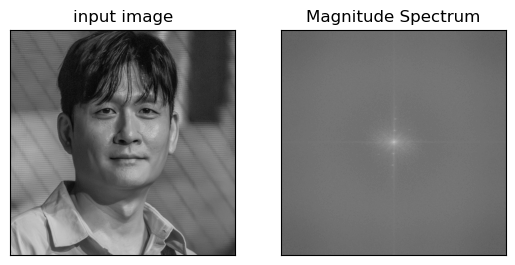

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread('images/_X1A0372-Enhanced-NR.jpg', cv2.IMREAD_GRAYSCALE)

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum_original = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('input image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()